# Beispiel Stromproduktion 3: Scatterplot, Regression, Korrelation

### Datenvisualisierung mit Python/Matplotlib

### Datenbeispiel: Stromproduktion in der Schweiz

Datenquelle: Bundesamt für Energie
Webseite: https://opendata.swiss/dataset/energiedashboard-ch-stromproduktion-swissgrid

Zeitpunkt der Abrfrage: 03.10.2024

Format: CSV (.csv)

## 1. Einlesen und Organisation der Daten

Zum importieren von CSV-Files kann das Modul Pandas verwendet werden.
https://pandas.pydata.org/


Installieren mit Anaconda (im Anaconda Prompt (Windows) oder Terminal (Linux oder MacOS):

    conda install pandas


#### Modul Pandas importieren

In [1]:
#Pandas importieren
import pandas as pd

#### Erste Seite des Excel-Files lesen und anzeigen

In [2]:
# CSV-file lesen
df = pd.read_csv('ogd104_stromproduktion_swissgrid.csv')

In [3]:
# Eingelesene Daten anzeigen
df

,Datum,Energietraeger,Produktion_GWh
0,2014-01-01,Flusskraft,26.1
1,2014-01-01,Kernkraft,80.1
2,2014-01-01,Speicherkraft,23.3
3,2014-01-01,Thermische,10.3
4,2014-01-02,Flusskraft,26.0
...,...,...,...
22833,2024-10-02,Kernkraft,63.1
22834,2024-10-02,Photovoltaik,10.5
22835,2024-10-02,Speicherkraft,94.8
22836,2024-10-02,Thermische,9.6


#### Struktur der Dataframes

Datenstruktur: Dictionnary; die Spalten des CSV-files sind über Keys() zugänglich

In [4]:
# Verfügbare Keys anzeigen lassen
df.keys()

Index(['Datum', 'Energietraeger', 'Produktion_GWh'], dtype='object')

In [5]:
# Eine bestimmte Spalte auswählen
df['Energietraeger']

0           Flusskraft
1            Kernkraft
2        Speicherkraft
3           Thermische
4           Flusskraft
             ...      
22833        Kernkraft
22834     Photovoltaik
22835    Speicherkraft
22836       Thermische
22837             Wind
Name: Energietraeger, Length: 22838, dtype: object

#### Daten neu ordnen: Datensatz in verschiedene Zeitreihen nach Energieträger gruppieren

Im Inputfile sind alle Energieerzeugungsdaten in der zweiten Spalte gespeichert, der jeweilige Energieträger ist jeweils in der ersten Spalte angegeben. Zur Visualisierung müssen die Daten nach Energieträger gruppiert werden.

In [6]:
# Liste der verschiedenen Energieträger erstellen
Energiearten = []
for en in df['Energietraeger']:
      if not en in Energiearten:
          Energiearten.append(en);

print('Liste der Energieträger: \n', Energiearten)

Liste der Energieträger: 
 ['Flusskraft', 'Kernkraft', 'Speicherkraft', 'Thermische', 'Photovoltaik', 'Wind']


In [7]:
# Einen bestimmten Energieträger auswählen und in neuem Dataframe speichern
df_fluss = df.loc[df['Energietraeger'] == 'Flusskraft']
df_kern = df.loc[df['Energietraeger'] == 'Kernkraft']
df_speicher = df.loc[df['Energietraeger'] == 'Speicherkraft']
df_therm = df.loc[df['Energietraeger'] == 'Thermische']
df_photo = df.loc[df['Energietraeger'] == 'Photovoltaik']
df_wind = df.loc[df['Energietraeger'] == 'Wind']
print('Anzahl Datenpunkte pro Energieträger:\n')
print('\tFlusskraft:\t', len(df_fluss))
print('\tKernkraft:\t', len(df_kern))
print('\tSpeicherkraft:\t', len(df_speicher))
print('\tThermische:\t', len(df_therm))
print('\tPhotovoltaik:\t', len(df_photo))
print('\tWind:\t\t', len(df_wind))

Anzahl Datenpunkte pro Energieträger:

	Flusskraft:	 3928
	Kernkraft:	 3928
	Speicherkraft:	 3928
	Thermische:	 3928
	Photovoltaik:	 3563
	Wind:		 3563


## 2. Vergleich der  Stromerzeugung verschiedener Energieträger

#### Notwendige Module importieren

In [8]:
# Matplotlib zum erstellen der Grafiken
import matplotlib.pyplot as plt

#### Zeitreihen für alle Energieträger plotten

Für einen allgemeinen Überblick wird zuerst die Stromproduktion aller Energieträger in einzelnen Subplots visualisiert.

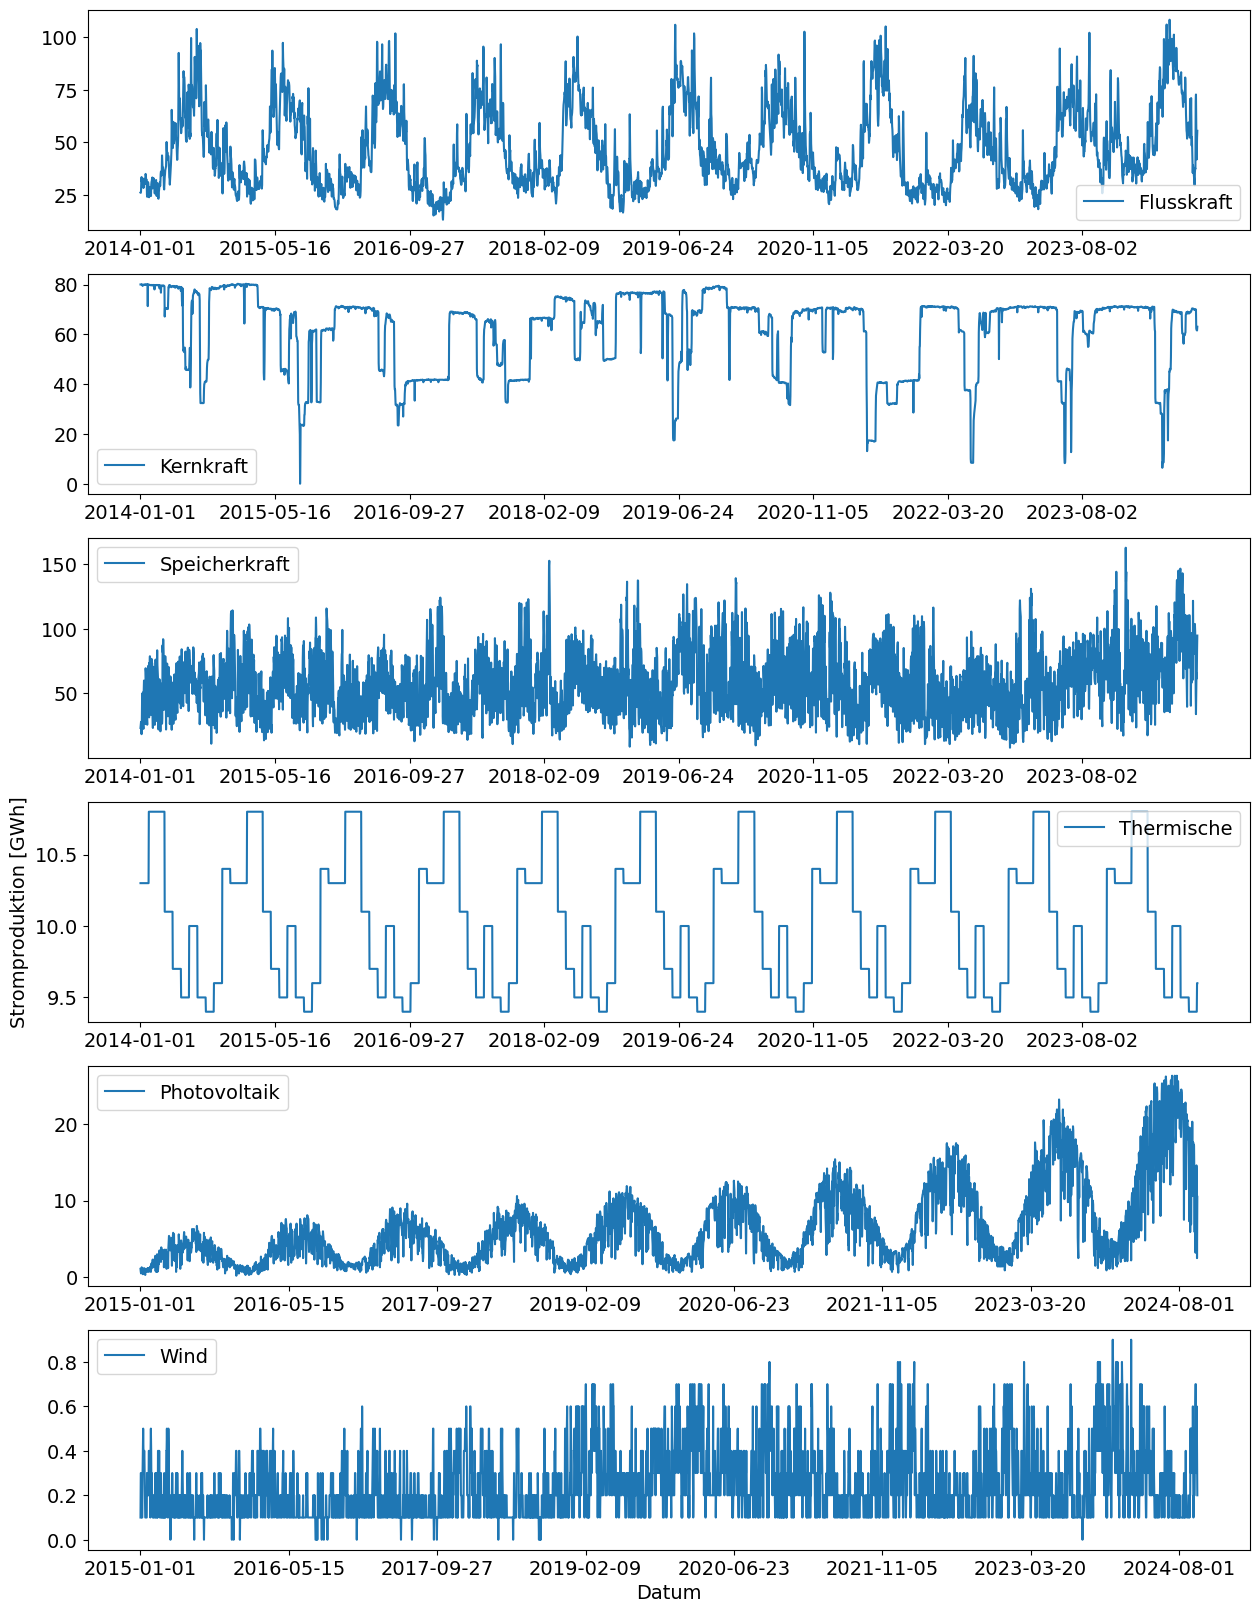

In [9]:
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

# Matplotlib subplots
f, axs = plt.subplots(6,1, figsize=(15, 20)) # Definieren der Subplots

# Subplot Stromproduktion aus Flusskraft
plt.subplot(6, 1, 1)
plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh']) 
plt.xticks(df_fluss['Datum'][0::500])
plt.legend(['Flusskraft'])

# Subplot Stromproduktion aus Kernkraft
plt.subplot(6, 1, 2)
plt.plot(df_kern['Datum'],df_kern['Produktion_GWh'])
plt.xticks(df_kern['Datum'][0::500])
plt.legend(['Kernkraft'])

# Subplot Stromproduktion aus Speicherkraftwerke
plt.subplot(6, 1, 3)
plt.plot(df_speicher['Datum'],df_speicher['Produktion_GWh'])
plt.xticks(df_speicher['Datum'][0::500])
plt.legend(['Speicherkraft'])

# Subplot Stromproduktion thermische Kraftwerke
plt.subplot(6, 1, 4)
plt.plot(df_therm['Datum'],df_therm['Produktion_GWh'])
plt.xticks(df_therm['Datum'][0::500])
plt.legend(['Thermische'])
plt.ylabel('Stromproduktion [GWh]')

# Subplot Stromproduktion aus Photovoltaik
plt.subplot(6, 1, 5)
plt.plot(df_photo['Datum'],df_photo['Produktion_GWh'])
plt.xticks(df_photo['Datum'][0::500])
plt.legend(['Photovoltaik'])

# Subplot Stromproduktion aus Windkraft
plt.subplot(6, 1, 6)
plt.plot(df_wind['Datum'],df_wind['Produktion_GWh'])
plt.xticks(df_wind['Datum'][0::500])
plt.legend(['Wind'])
plt.xlabel('Datum')

plt.show()

## 3. Vergleich zweier Energieträger: Scatterplot, lineare Regression und Korrelationkoeffizient

Die Korrelation zweier Zeitreihen kann visualisiert werden, indem man die Zeitreihen in einem Scatterplot gegeneinander aufträgt. Beispiel hier: Stromproduktion aus Flusskraft gegen Stromproduktion aus Photovoltaik. Als erstes visulalisieren wir beide Zeitreihen im gleichen Plot.

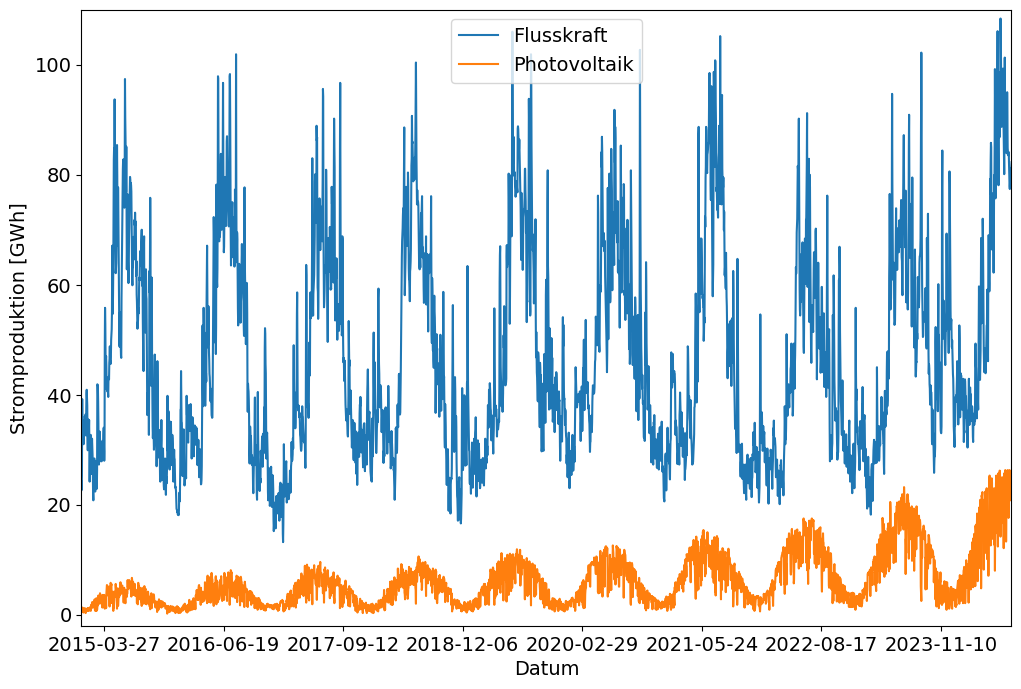

In [10]:
## Matplotlib subplots
f, axs = plt.subplots(1,1, figsize=(12, 8))

lx1 = '2015-01-01' # unteres Limit x-Achse
lx2 = '2024-08-01' # oberes Limit y-Achse
ly1 = -2.0   # unteres Limit y-Achse
ly2 = 110.0 # oberes Limit y-Achse

plt.subplot(1, 1, 1)
plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh'])
plt.plot(df_photo['Datum'],df_photo['Produktion_GWh'])
plt.xticks(df_fluss['Datum'][0::450])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Flusskraft','Photovoltaik']) # Beschriftung der Datensätze
plt.ylabel('Stromproduktion [GWh]')
plt.xlabel('Datum')

plt.show()

#### Listen gleicher Länge erzeugen

Für den Scatterplot werden Listen gleicher länge gebraucht. Dazu werden die in beiden Arrays nur die letzten 3000 Datenpunkte ausgewählt und als neues Array gespeichert.

In [11]:
# Neue Arrays erzeugen
df_photo_red = df_photo['Produktion_GWh'][-(3500-len(df_photo)):]
df_fluss_red = df_fluss['Produktion_GWh'][-(3500-len(df_fluss)):]

### Scatterplot zur Datenvisualisierung

Die Stromproduktion aus beiden Quellen wird gegeneinander aufgetragen.

<Figure size 640x500 with 0 Axes>

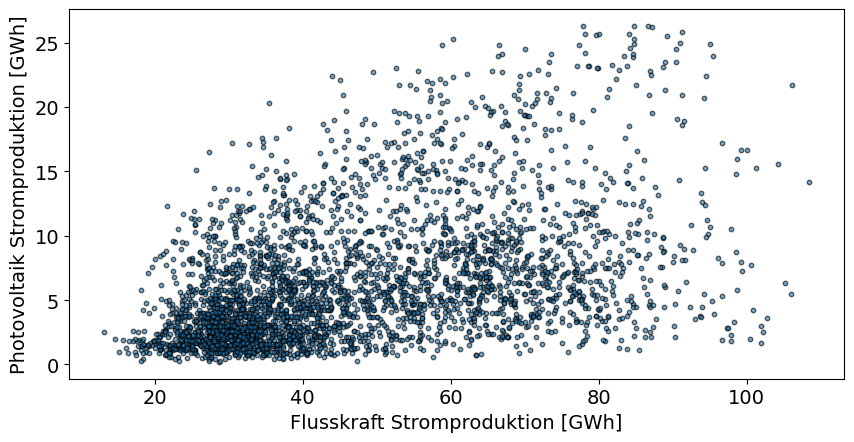

In [12]:
plt.figure().set_figheight(5)
plt.figure().set_figwidth(10)
plt.scatter(df_fluss_red, df_photo_red, s=10, alpha=0.6, edgecolors="k") # Scatterplot Flusskrft gegen Photovoltaik
plt.xlabel('Flusskraft Stromproduktion [GWh]') # Beschriftung x-Achse
plt.ylabel('Photovoltaik Stromproduktion [GWh]') # Beschriftung y-Achse
plt.show()

### Lineare Regression

Die Korrelation der beiden Datensätze kann anhand der linearen Regression visualisiert werden. Zur Berechnung der Regression wird die Funktion numpy.polyfit() verwendet:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [13]:
# Numpy importieren
import numpy as np

Linearen Regression mit least squares mit np.polyfit() Das Resultat ist die Steigung (b) und Achsenabschitt (a) der Regressionslinie. Der Grad des Polynoms wird über deg=1 (linear) festgelegt.

In [14]:
# Fitten der linearen Regression mit least squares with np.polyfit
b, a = np.polyfit(df_fluss_red, df_photo_red, deg=1)
print('b = ', b, '\ta =', a)

b =  0.12015544890905705 	a = 0.8015406807714768


<Figure size 640x500 with 0 Axes>

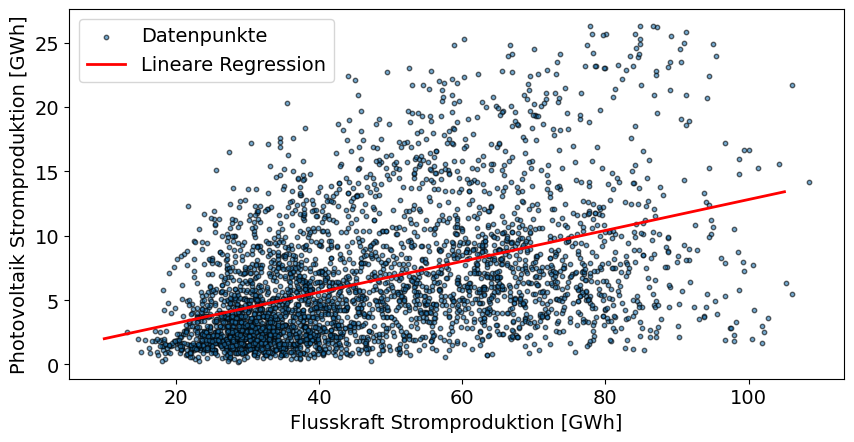

In [15]:
plt.figure().set_figheight(5) # Breite
plt.figure().set_figwidth(10) # Höhe
plt.scatter(df_fluss_red, df_photo_red, s=10, alpha=0.6, edgecolors="k") # Scatterplot Flusskrft gegen Photovoltaik

# Sequenz der Zahlen von 10 bis 105 generieren (für Darstellung)
xseq = np.linspace(10, 105, num=100)

# Regressionslinie plotten
plt.plot(xseq, a + b * xseq, color="r", lw=2.0);

plt.xlabel('Flusskraft Stromproduktion [GWh]')  # Beschriftung x-Achse
plt.ylabel('Photovoltaik Stromproduktion [GWh]')  # Beschriftung y-Achse

plt.legend(['Datenpunkte','Lineare Regression']) # Beschriftung Daten
plt.show()

### Korrelationskoeffizient berechnen mit Numpy

Als Mass für die Korrelation von Datensätzen kann der Korrelationskoeffizient berechnet werden.

     1: maximale korrelation der Daten
     0: keine Korrelation
    -1: negative Korrelation

Die Korrelation kann mit numpy.corrcoef() berechnet werden. Berechnet wird dabei jeweils eine Korrelationsmatrix. Bei zwei Datensätzen als input sind die Diagonalelemente (0,0) und (1,1) jeweils 1, da sie der Korrelation der Datenätze mit sich selber entsprechen. Die Elemente (0,1) und (1,0) entsprechen der Korrelation der Datensätze miteinander.

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

In [16]:
# Korrelationsmatrix berechnen
r = np.corrcoef(df_fluss_red, df_photo_red)

# Nicht-diagonale Elemente der Korrelationsmatrix ausgeben
print("Korrelationskoeffizient = ", r[0,1]) 

Korrelationskoeffizient =  0.4514066878583702
